# **1. Perkenalan Dataset**


Dataset ini berjudul **"Telco Customer Churn"** dan berasal dari IBM Sample Data. Dataset ini berisi informasi pelanggan dari perusahaan telekomunikasi, termasuk layanan yang digunakan, status kontrak, demografi, serta apakah pelanggan tersebut berhenti (churn) atau tidak.

**Tujuan proyek ini** adalah untuk membangun model klasifikasi yang dapat memprediksi apakah seorang pelanggan berpotensi berhenti menggunakan layanan (*churn*) berdasarkan data historis mereka.

Dataset ini sangat sesuai untuk penerapan MLOps karena memiliki:
- Target variabel klasifikasi yang jelas (`Churn`)
- Fitur yang cukup kompleks (numerik & kategorikal)
- Use-case bisnis nyata: retensi pelanggan

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
# Manipulasi data
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Modeling
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
# Load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Lihat 5 data pertama
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


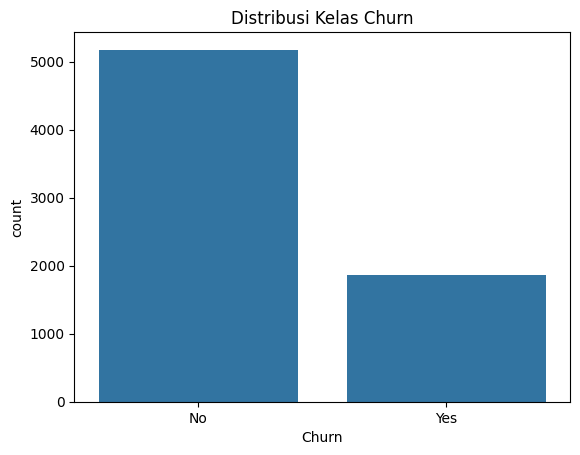

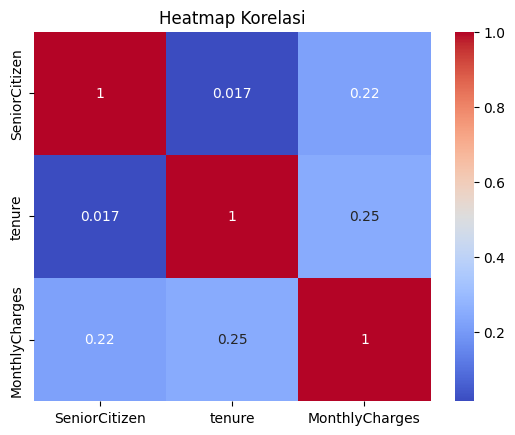

In [ ]:
# Informasi umum dataset
df.info()

# Statistik deskriptif
df.describe(include='all')

# Cek distribusi target
sns.countplot(data=df, x='Churn')
plt.title("Distribusi Kelas Churn")
plt.show()

# Korelasi antar fitur numerik
numerical = df.select_dtypes(include=np.number)
sns.heatmap(numerical.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
# 1. Menghapus/Menangani Nilai Kosong (Missing Values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].replace(" ", np.nan), errors='coerce')
print(f"Jumlah missing value:\n{df.isnull().sum()}")  # Cek NaN
df.dropna(inplace=True)

# 2. Menghapus Data Duplikat
print(f"Jumlah duplikat: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

# 3. Drop kolom ID jika ada
if 'customerID' in df.columns:
    df.drop(columns='customerID', inplace=True)

# 4. Deteksi Outlier (contoh dengan IQR pada TotalCharges)
Q1 = df['TotalCharges'].quantile(0.25)
Q3 = df['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['TotalCharges'] < Q1 - 1.5 * IQR) | (df['TotalCharges'] > Q3 + 1.5 * IQR)]
print(f"Jumlah outlier TotalCharges (berdasarkan IQR): {len(outliers)}")

# hapus outlier
df = df[~((df['TotalCharges'] < Q1 - 1.5 * IQR) | (df['TotalCharges'] > Q3 + 1.5 * IQR))]

# 5. Encoding Data Kategorikal
from sklearn.preprocessing import LabelEncoder

categorical = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical:
    df[col] = le.fit_transform(df[col])

# 6. Normalisasi atau Standarisasi Fitur Numerik
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical] = scaler.fit_transform(df[numerical])

# 7. Binning (Contoh pada tenure: Low, Medium, High)
df['tenure_group'] = pd.cut(df['tenure'],
                            bins=[-np.inf, -0.5, 0.5, np.inf],
                            labels=['Low', 'Medium', 'High'])

# Lihat hasil akhir
print(df.head())

Jumlah missing value:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Jumlah duplikat: 0
Jumlah outlier TotalCharges (berdasarkan IQR): 0
   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0 -1.285566             0   
1       1              0        0           0  0.060346             1   
2       1              0        0           0 -1.244781             1   
3       1              0        0           0  0.508983             0   
4       0              0        0           0 -1.244781             1   

   MultipleLines  